In [72]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [115]:
class CustomLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns
        self.classes_ = []
        self.testVar = []
        
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        le = preprocessing.LabelEncoder()
        output = X.copy()
        
        self.columns = []
        self.classes_= []
        for colname,col in output.iteritems():
            output[colname] = le.fit_transform(col)
            self.columns.append(colname)
            self.classes_.append(le.classes_)
        target = {'play' : output['play']}
        target = pd.DataFrame(data=target)
        output = output.drop(labels='play', axis = 1)
        return (output,target)

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    def inverse_transform(self, X):
        output = X.copy()
        le = preprocessing.LabelEncoder()
        i = 0
        for colname,col in output.iteritems():
            le.fit(self.classes_[i])
            output[colname] = le.inverse_transform(col)
            i += 1
        
        return output

le = CustomLabelEncoder()

In [117]:
#READ DATA FROM CSV
dataframe = pd.read_csv("weather.nominal.csv")
output, target = le.fit_transform(dataframe)

In [118]:
output

,outlook,temperature,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [119]:
target

,play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [126]:

nbrs = KNeighborsClassifier(n_neighbors=2, algorithm='auto').fit(output,target)
#distances, indices = nbrs.kneighbors(dataframe)
#dataframe = le.inverse_transform(dataframe)
#dataframe
nbrs.predict([[0,1,1,1]])
#le.inverse_transform(dataframe)

c:\users\rebellion\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([1])

# Metode Naive Bayes

### Pembelajaran dengan skema split train 90% dan test 10% 

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Gaussian naive Bayes classifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

def sklearn_to_df(sklearn_dataset):
    '''
        Converts sklearn dataset to pandas dataframe to show data more aesthetically
    '''
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['species'] = sklearn_dataset.target_names[pd.Series(sklearn_dataset.target)]
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

# load dataset from Sckitlearn dataset with the target label
iris_dataset = datasets.load_iris()
iris_data = sklearn_to_df(iris_dataset)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [3]:
# splitting dataset into data and target
x = iris_dataset.data
y = iris_dataset.target

print("Training with Naive Bayes....")

# splittiing dataset into train and test
x_train, x_testSet, y_train, y_testSet = train_test_split(x, y, test_size=0.1)

# creating a model 
model = GaussianNB().fit(x_train, y_train)

# testing model with test data
prediction = model.predict(x_testSet)

# comparing prediction from model with target from test set
print("Prediction     : ", end="")
print(prediction)
print("Dataset Target : ", end="")
print(y_testSet)

# printing accuracy score and confusion matrix
accuracy = accuracy_score(y_testSet, prediction)
print("Model Accuracy: %.2f%%" % (float)(accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(y_testSet,prediction))

Training with Naive Bayes....
Prediction     : [2 1 1 0 1 1 2 0 1 1 1 1 0 0 2]
Dataset Target : [2 1 1 0 1 1 2 0 1 1 1 1 0 0 2]
Model Accuracy: 100.00%
Confusion Matrix: 
[[4 0 0]
 [0 8 0]
 [0 0 3]]


## Pembelajaran dengan skema 10-fold cross validation

In [4]:
from sklearn.model_selection import KFold, cross_val_score

kfolds = KFold(n_splits=10, shuffle=True)
arr = cross_val_score(model, x, y, cv=kfolds)
print(arr)
print(np.average(arr))

[0.93333333 0.86666667 1.         0.86666667 1.         1.
 1.         0.93333333 1.         0.93333333]
0.9533333333333335


## Menyimpan model ke dalam file eksternal

In [5]:
import pickle

filename="model.sav"
pickle.dump(model, open(filename, "wb"))

## Membaca model dari file eksternal

In [6]:
loaded_model = pickle.load(open(filename, 'rb'))

## Membuat Instance baru

In [7]:
x_new = [[6.3, 3.0, 5.4, 1.8]]

## Melakukan klasifikasi pada instance baru

In [8]:
print(loaded_model.predict(x_new))

[2]


# Decision Tree

## Pembelajaran dengan skema split train 90% dan test 10%

In [9]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

def sklearn_to_df(sklearn_dataset):
    '''
        Converts sklearn dataset to pandas dataframe to show data more aesthetically
    '''
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['species'] = sklearn_dataset.target_names[pd.Series(sklearn_dataset.target)]
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

# load dataset from Sckitlearn dataset with the target label
iris_dataset = datasets.load_iris()
iris_data = sklearn_to_df(iris_dataset)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [10]:
# splitting dataset into data and target
x = iris_dataset.data
y = iris_dataset.target

print("Training with Decision Tree....")

# splittiing dataset into train and test
x_train, x_testSet, y_train, y_testSet = train_test_split(x, y, test_size=0.1)

dtModelClassifier = DecisionTreeClassifier()
dtModelClassifier.fit(x_train, y_train)

# testing model with test data
dtPrediction = dtModelClassifier.predict(x_testSet)

# comparing prediction from model with target from test set
print("Prediction     : ", end="")
print(dtPrediction)
print("Dataset Target : ", end="")
print(y_testSet)

# printing accuracy score and confusion matrix
accuracy = accuracy_score(y_testSet, dtPrediction)
print("Model Accuracy: %.2f%%" % (float)(accuracy * 100))
print("Confusion Matrix: ")
print(confusion_matrix(y_testSet,dtPrediction))

Training with Decision Tree....
Prediction     : [0 1 2 1 1 1 1 1 1 1 2 0 1 1 2]
Dataset Target : [0 1 2 1 1 1 1 1 1 1 2 0 1 1 2]
Model Accuracy: 100.00%
Confusion Matrix: 
[[ 2  0  0]
 [ 0 10  0]
 [ 0  0  3]]


## Pembelajaran dengan skema 10-fold cross validation

In [11]:
from sklearn.model_selection import KFold, cross_val_score

kfolds = KFold(n_splits=10, shuffle=True)
arr = cross_val_score(dtModelClassifier, x, y, cv=kfolds)
print(arr)
print(np.average(arr))

[0.93333333 1.         1.         0.93333333 0.93333333 0.93333333
 1.         0.93333333 0.93333333 1.        ]
0.96


## Menyimpan model dalam file eksternal

In [12]:
import pickle

tree_filename="tree_model.sav"
pickle.dump(dtModelClassifier, open(tree_filename, "wb"))

## Membaca model dalam file eksternal

In [13]:
loaded_model = pickle.load(open(tree_filename, 'rb'))

## Membuat Instance baru

In [14]:
x_new = [[6.3, 3.0, 5.4, 1.8]]

## Melakukan klasifikasi pada instance baru

In [15]:
print(loaded_model.predict(x_new))

[2]


## Model yang dihasilkan

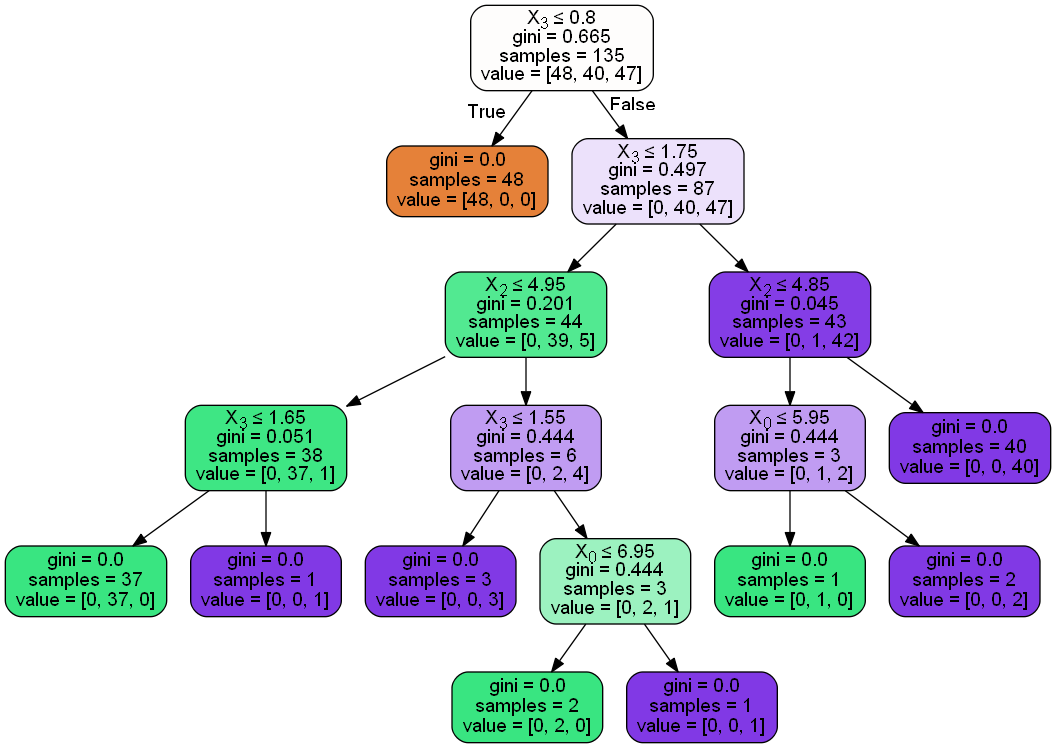

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtModelClassifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())